### **Problem 1**

**Coin Toss Simulation**

You flip a fair coin.

* Simulate tossing the coin **100, 1,000, 10,000** times.
* Track the proportion of **Heads** as the number of tosses increases.
* Show how the proportion approaches the **true probability** of 0.5.



### **Solution 1**


**Why the probability is 0.5**

A fair coin has **two equally likely outcomes**:

* **Heads (H)**
* **Tails (T)**

Since there are 2 outcomes and both are equally likely, the probability of getting **Heads** is

$$
P(\text{Heads}) = \frac{1}{2} = 0.5
$$

and the same for Tails.


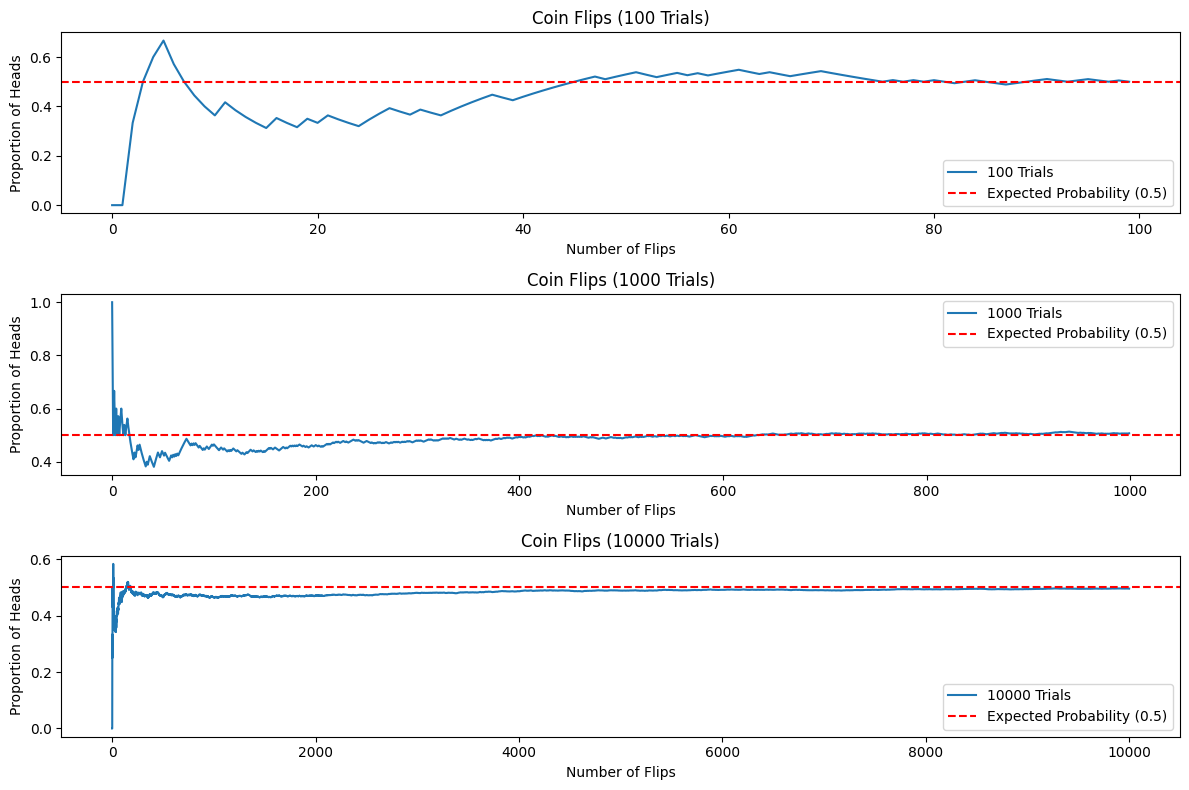

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100)

# Different trial sizes
trial_sizes = [100, 1000, 10000]

plt.figure(figsize=(12, 8))

for i, n_trials in enumerate(trial_sizes, 1):
    # Simulate coin flips: 1 = heads, 0 = tails
    flips = np.random.choice([0, 1], size=n_trials)
    
    # Running proportion of heads
    running_proportion = np.cumsum(flips) / np.arange(1, n_trials + 1)
    
    # Subplot
    plt.subplot(3, 1, i)
    plt.plot(running_proportion, label=f"{n_trials} Trials")
    plt.axhline(0.5, color="red", linestyle="--", label="Expected Probability (0.5)")
    plt.xlabel("Number of Flips")
    plt.ylabel("Proportion of Heads")
    plt.title(f"Coin Flips ({n_trials} Trials)")
    plt.legend()

plt.tight_layout()
plt.show()

---

### **Problem 2**

**Dice Rolls and Averages**

You roll a fair 6-sided die.

* Simulate rolling the die **50, 500, 5,000, 50,000** times.
* Compute the **average outcome** after each experiment.
* Show how the average converges to the **expected value** $E[X] = 3.5$.



### **Solution 2**

**Why the expected value is 3.5**

A fair 6-sided die has **six equally likely outcomes**:

$$
\{1, 2, 3, 4, 5, 6\}
$$

Since each outcome has probability

$$
P(k) = \frac{1}{6}, \quad k = 1,2,3,4,5,6,
$$

the expected value is the weighted average of all possible outcomes:

$$
E[X] = \sum_{k=1}^{6} k \cdot P(k)  
= \frac{1}{6}(1 + 2 + 3 + 4 + 5 + 6).
$$

Simplifying:

$$
E[X] = \frac{21}{6} = 3.5
$$

Thus, as the number of rolls increases, the average outcome converges to **3.5**.

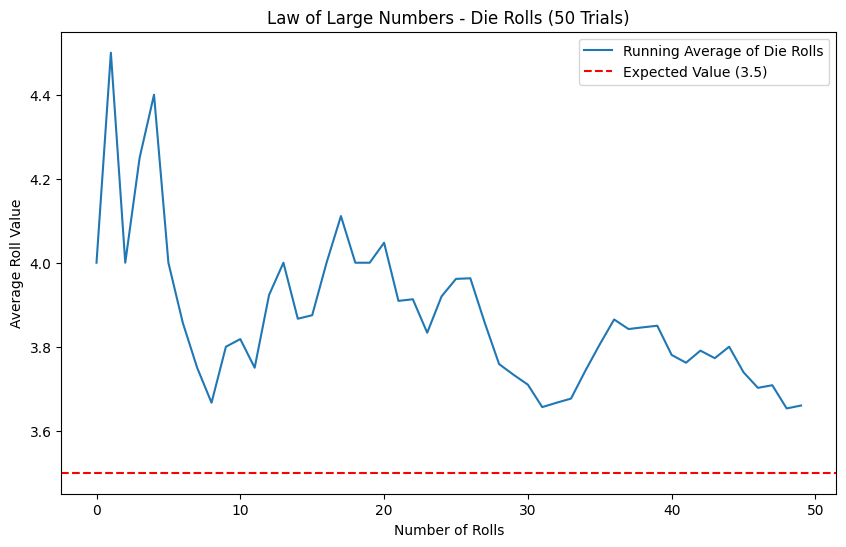

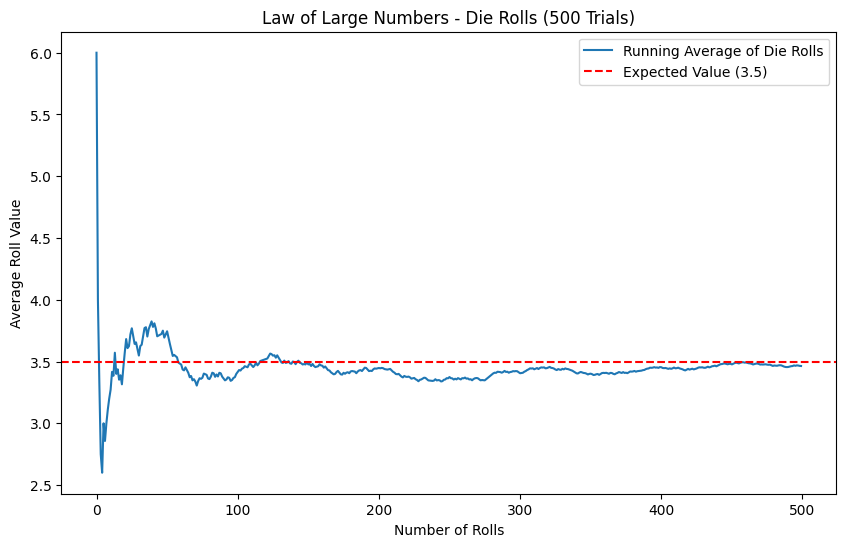

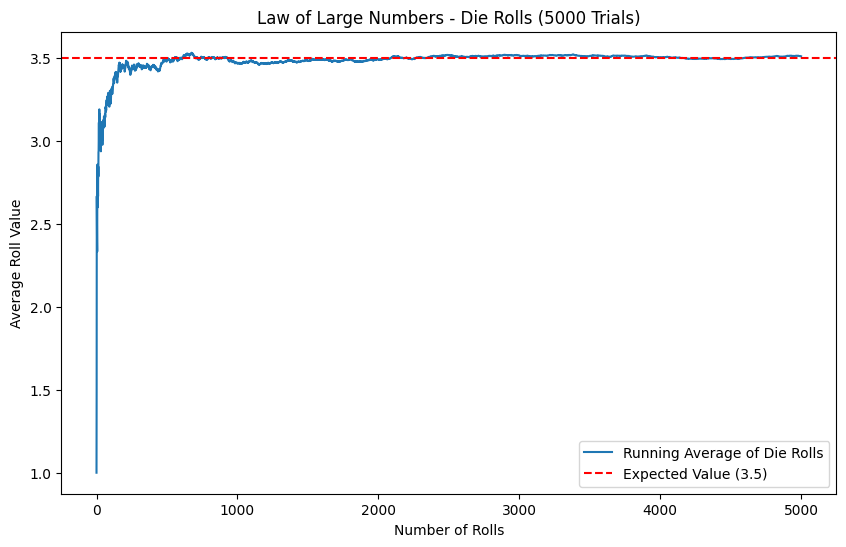

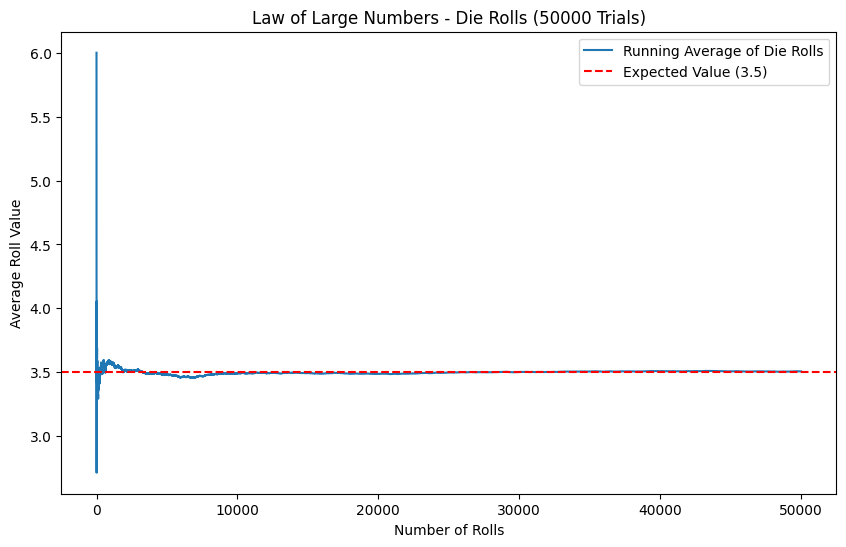

In [14]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Different trial sizes
trial_sizes = [50, 500, 5000, 50000]

for n_trials in trial_sizes:
    # Simulate die rolls (values 1 through 6)
    rolls = np.random.randint(1, 7, size=n_trials)
    
    # Running average of die rolls
    running_average = np.cumsum(rolls) / np.arange(1, n_trials + 1)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(running_average, label="Running Average of Die Rolls")
    plt.axhline(3.5, color="red", linestyle="--", label="Expected Value (3.5)")
    plt.xlabel("Number of Rolls")
    plt.ylabel("Average Roll Value")
    plt.title(f"Law of Large Numbers - Die Rolls ({n_trials} Trials)")
    plt.legend()
    plt.show()

---

### **Problem 3**

**Biased Coin**

A biased coin has $P(\text{Heads}) = 0.7$.

* Simulate tossing the coin **100, 1,000, 10,000** times.
* Track the proportion of **Heads**.
* Compare convergence to the true probability 0.7.




### **Solution 3**

**Why the target probability is 0.7**

A **biased** coin is defined so that the probability of Heads is fixed at

$$
P(\text{Heads}) = 0.7,\qquad P(\text{Tails}) = 0.3.
$$

If we let $X_i=\mathbf{1}\{\text{Heads on toss } i\}$ (so $X_i\in\{0,1\}$), then each $X_i$ is **Bernoulli** with

$$
\mathbb{E}[X_i] = P(\text{Heads}) = 0.7.
$$

The sample proportion of Heads after $n$ tosses is

$$
\bar X_n=\frac{1}{n}\sum_{i=1}^n X_i,
$$

and by the **Law of Large Numbers**,

$$
\bar X_n \xrightarrow[n\to\infty]{} \mathbb{E}[X_i]=0.7.
$$

So, as you increase the number of tosses (100, 1,000, 10,000), the observed proportion of Heads should **converge toward $0.7$**.


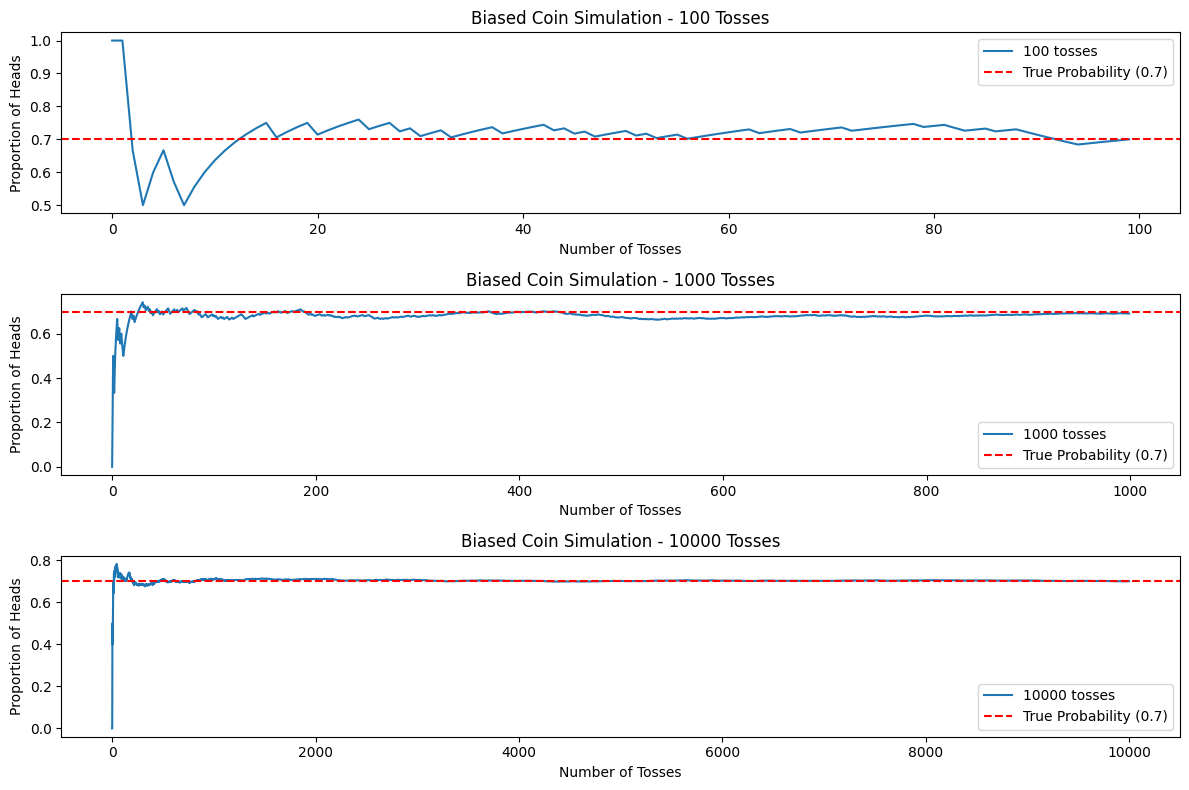

In [16]:
import numpy as np
import matplotlib.pyplot as plt


p_heads = 0.7
trials_list = [100, 1000, 10000]

plt.figure(figsize=(12, 8))

for i, n in enumerate(trials_list, 1):
    # Simulate biased coin tosses: 1 for heads, 0 for tails
    tosses = np.random.choice([1, 0], size=n, p=[p_heads, 1 - p_heads])
    
    # Compute running proportion of heads
    running_prop = np.cumsum(tosses) / np.arange(1, n + 1)
    
    # Plot
    plt.subplot(3, 1, i)
    plt.plot(running_prop, label=f"{n} tosses")
    plt.axhline(y=p_heads, color="r", linestyle="--", label="True Probability (0.7)")
    plt.xlabel("Number of Tosses")
    plt.ylabel("Proportion of Heads")
    plt.title(f"Biased Coin Simulation - {n} Tosses")
    plt.legend()

plt.tight_layout()
plt.show()

---

### **Problem 4**

**Distribution of Sample Means**

Take samples from a uniform distribution $U(0,1)$.

* For each sample size $n = 10, 100, 1,000$, compute the **sample mean**.
* Repeat this **1,000 times** and plot the distribution of sample means.
* Show how the sample mean stabilizes near the expected value $E[X] = 0.5$.




### **Solution 4**

**Why the sample mean stabilizes near 0.5**

The random variable comes from a **uniform distribution** \$U(0,1)\$, which assigns equal probability to all values between 0 and 1.

* The **expected value** of this distribution is

$$
E[X] = \frac{0 + 1}{2} = 0.5
$$

* When we take **larger samples**, the **Law of Large Numbers** ensures the sample mean gets closer to the true expected value.

Thus, as the sample size grows:

* \$n = 10\$ → more spread in the means
* \$n = 100\$ → means cluster more tightly around 0.5
* \$n = 1000\$ → means very close to 0.5

The sample mean converges to **0.5**, the true expectation of \$U(0,1)\$.

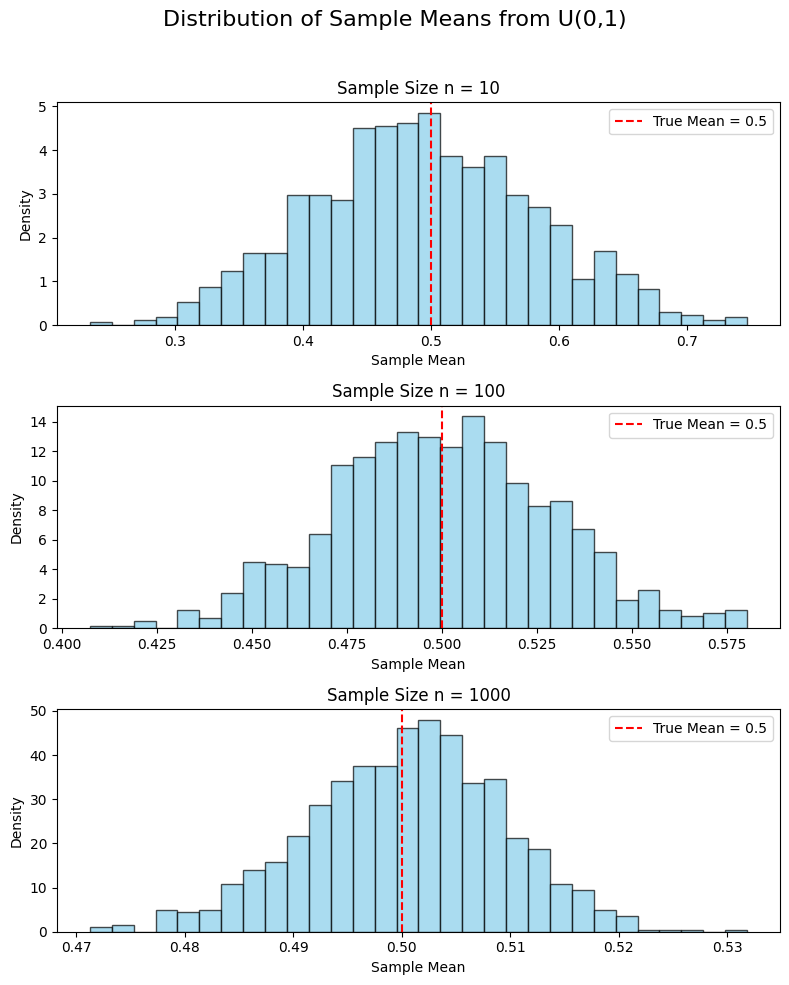

In [20]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42) 
trials = 1000
sample_sizes = [10, 100, 1000]

fig, axes = plt.subplots(len(sample_sizes), 1, figsize=(8, 10))
fig.suptitle("Distribution of Sample Means from U(0,1)", fontsize=16)

for i, n in enumerate(sample_sizes):
    sample_means = [np.mean(np.random.uniform(0, 1, n)) for _ in range(trials)]
    
    axes[i].hist(sample_means, bins=30, density=True, alpha=0.7, color="skyblue", edgecolor="black")
    axes[i].axvline(0.5, color="red", linestyle="--", label="True Mean = 0.5")
    axes[i].set_title(f"Sample Size n = {n}")
    axes[i].set_xlabel("Sample Mean")
    axes[i].set_ylabel("Density")
    axes[i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

---

### **Problem 5**

**Gambler’s Winnings**

A game pays +1 for a win (probability 0.4) and -1 for a loss (probability 0.6).

* Simulate the game for **10, 100, 1,000, 10,000** plays.
* Track the **average winnings per play**.
* Show that the average converges to the expected value:

$$
E[X] = (0.4)(+1) + (0.6)(-1) = -0.2
$$

### **Solution 5**

**Why the sample mean stabilizes near -0.2**

The random variable comes from the **gambling game**:

* Win (+1) with probability **0.4**
* Lose (–1) with probability **0.6**

The **expected value** is

$$
E[X] = (0.4)(+1) + (0.6)(-1) = 0.4 - 0.6 = -0.2
$$

* When we take **larger samples**, the **Law of Large Numbers** ensures the sample mean gets closer to the true expected value.

Thus, as the sample size grows:

* \$n = 10\$ → averages vary widely (some positive, some negative)
* \$n = 100\$ → averages begin clustering near -0.2
* \$n = 1000\$ → averages are much closer to -0.2
* \$n = 10000\$ → sample mean stabilizes around -0.2

The sample mean converges to **-0.2**, the true expectation of the game.


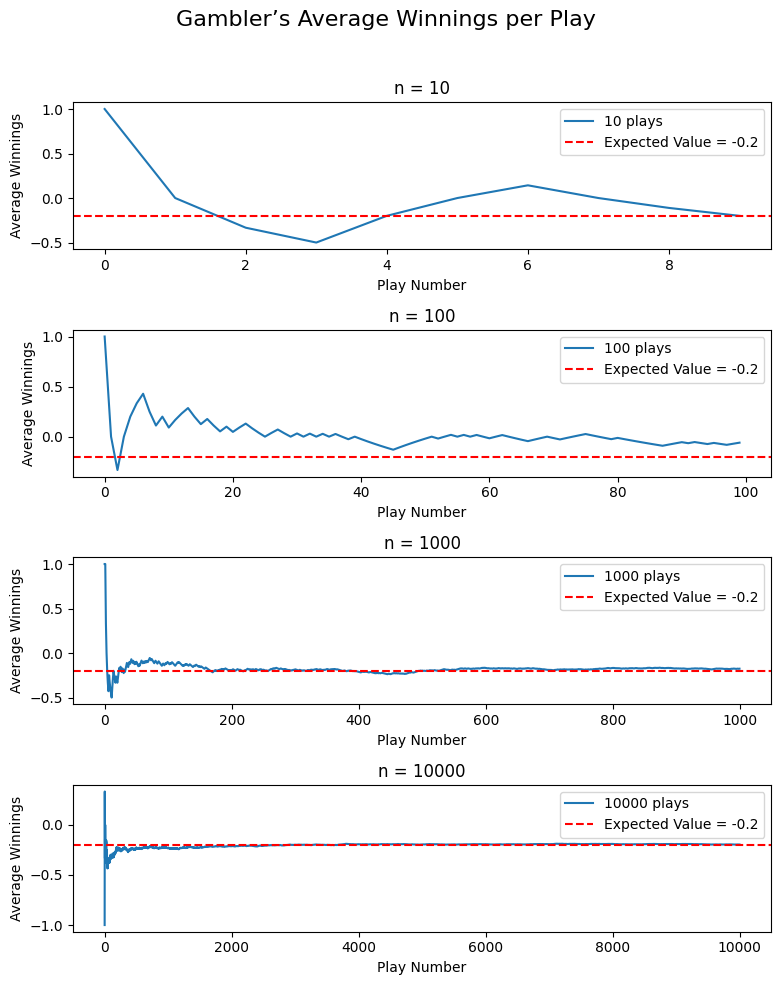

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# CONFIG
np.random.seed(42)
prob_win = 0.4
prob_loss = 0.6
n_trials = [10, 100, 1000, 10000]

# Simulate the game
def simulate_game(n):
    outcomes = np.random.choice([1, -1], size=n, p=[prob_win, prob_loss])
    avg_winnings = np.cumsum(outcomes) / np.arange(1, n+1)
    return avg_winnings

# PLOT
fig, axes = plt.subplots(len(n_trials), 1, figsize=(8, 10))
fig.suptitle("Gambler’s Average Winnings per Play", fontsize=16)

for i, n in enumerate(n_trials):
    avg_winnings = simulate_game(n)
    axes[i].plot(avg_winnings, label=f"{n} plays")
    axes[i].axhline(-0.2, color="red", linestyle="--", label="Expected Value = -0.2")
    axes[i].set_title(f"n = {n}")
    axes[i].set_xlabel("Play Number")
    axes[i].set_ylabel("Average Winnings")
    axes[i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()